### Import dataset

In [45]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.preprocessing import StandardScaler

In [46]:
np.random.seed(42)
df = pd.read_csv('churn_dataset.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [47]:
df.replace({"Yes": 1, "True": 1, "No": 0, "False": 0}, inplace=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [49]:
# Separating features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Excluding non-numeric features for the current analysis
numeric_features = X.select_dtypes(include=[np.number])

# Recalculating Information Gain
info_gain_numeric = mutual_info_classif(numeric_features, y, discrete_features='auto')

# Create a DataFrame for Information Gain for numeric features
info_gain_df_numeric = pd.DataFrame({'Feature': numeric_features.columns, 'Information Gain': info_gain_numeric})

# Recalculating Correlation for numeric features
correlation_numeric = numeric_features.apply(lambda x: x.corr(y))

# Create a DataFrame for Correlation for numeric features
correlation_df_numeric = pd.DataFrame({'Feature': numeric_features.columns, 'Correlation': correlation_numeric})

# Merging the two DataFrames on Feature for numeric features
feature_ranking_numeric = pd.merge(info_gain_df_numeric, correlation_df_numeric, on='Feature')

# Sorting the DataFrame based on Information Gain and Correlation for numeric features
feature_ranking_numeric.sort_values(by=['Information Gain', 'Correlation'], ascending=False, inplace=True)

feature_ranking_numeric.reset_index(drop=True, inplace=True)

feature_ranking_numeric



,Feature,Information Gain,Correlation
0,Total day minutes,0.054456,0.205151
1,Total day charge,0.051735,0.205151
2,Customer service calls,0.038042,0.208750
3,International plan,0.023663,0.259852
4,Number vmail messages,0.010412,-0.089728
5,Total intl minutes,0.010018,0.068239
6,Area code,0.006019,0.006174
7,Total night charge,0.005234,0.035496
8,Voice mail plan,0.003154,-0.102148
9,Total night minutes,0.002755,0.035493


In [50]:
# Eliminating features with 0 Information Gain
feature_ranking_filtered = feature_ranking_numeric[feature_ranking_numeric['Information Gain'] > 0]

feature_ranking_filtered.reset_index(drop=True, inplace=True)
feature_ranking_filtered['Feature'].values

array(['Total day minutes', 'Total day charge', 'Customer service calls',
       'International plan', 'Number vmail messages',
       'Total intl minutes', 'Area code', 'Total night charge',
       'Voice mail plan', 'Total night minutes', 'Account length',
       'Total day calls'], dtype=object)

In [51]:
X = numeric_features.drop(columns=[col for col in numeric_features.columns if col not in feature_ranking_filtered['Feature'].values])
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total night minutes,Total night charge,Total intl minutes,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,244.7,11.01,10.0,1
1,107,415,0,1,26,161.6,123,27.47,254.4,11.45,13.7,1
2,137,415,0,0,0,243.4,114,41.38,162.6,7.32,12.2,0
3,84,408,1,0,0,299.4,71,50.90,196.9,8.86,6.6,2
4,75,415,1,0,0,166.7,113,28.34,186.9,8.41,10.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,279.1,12.56,9.9,2
3329,68,415,0,0,0,231.1,57,39.29,191.3,8.61,9.6,3
3330,28,510,0,0,0,180.8,109,30.74,191.9,8.64,14.1,2
3331,184,510,1,0,0,213.8,105,36.35,139.2,6.26,5.0,2


In [52]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(pd.get_dummies(numeric_features))

# Converting the standardized features back to a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=numeric_features.columns)

# Displaying the first few rows of the standardized features
X_standardized_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=len(X_standardized_df.columns), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgf', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


84/84 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8556 - val_loss: 0.3899 - val_accuracy: 0.8486
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8575 - val_loss: 0.3546 - val_accuracy: 0.8486
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8623 - val_loss: 0.3310 - val_accuracy: 0.8576
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8710 - val_loss: 0.3159 - val_accuracy: 0.8681
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8792 - val_loss: 0.3026 - val_accuracy: 0.8681
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8878 - val_loss: 0.2909 - val_accuracy: 0.8771
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.2715 - accuracy: 0.8957 - val_loss: 0.2799 - val_accuracy: 0.8831
Epoch 8/100
84/84 [======

Training Accuracy: 0.9771192669868469
Training Loss: 0.0759086161851883
Validation Accuracy: 0.9325337409973145
Validation Loss: 0.2189878225326538


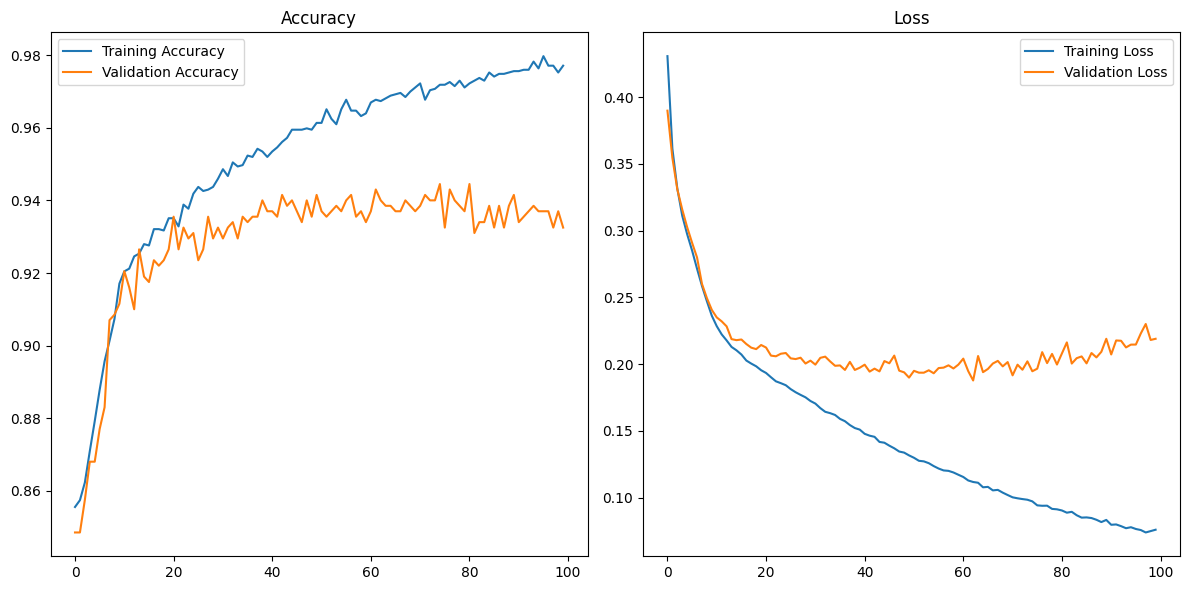

In [64]:
import matplotlib.pyplot as plt

# Print the accuracy and loss
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {train_acc[-1]}')
print(f'Training Loss: {train_loss[-1]}')
print(f'Validation Accuracy: {val_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]}')

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
